In [5]:
import sys
sys.path.insert(0, '..')
from datetime import datetime
import pandas as pd
from bcb import sgs

In [6]:
df = sgs.get({'USDBRL': 1}, last=10)

In [7]:
df

,USDBRL
Date,
2025-02-17,5.7105
2025-02-18,5.6979
2025-02-19,5.7087
2025-02-20,5.7019
2025-02-21,5.7027
2025-02-24,5.7258
2025-02-25,5.7779
2025-02-26,5.7757
2025-02-27,5.8228


<Axes: xlabel='Date'>

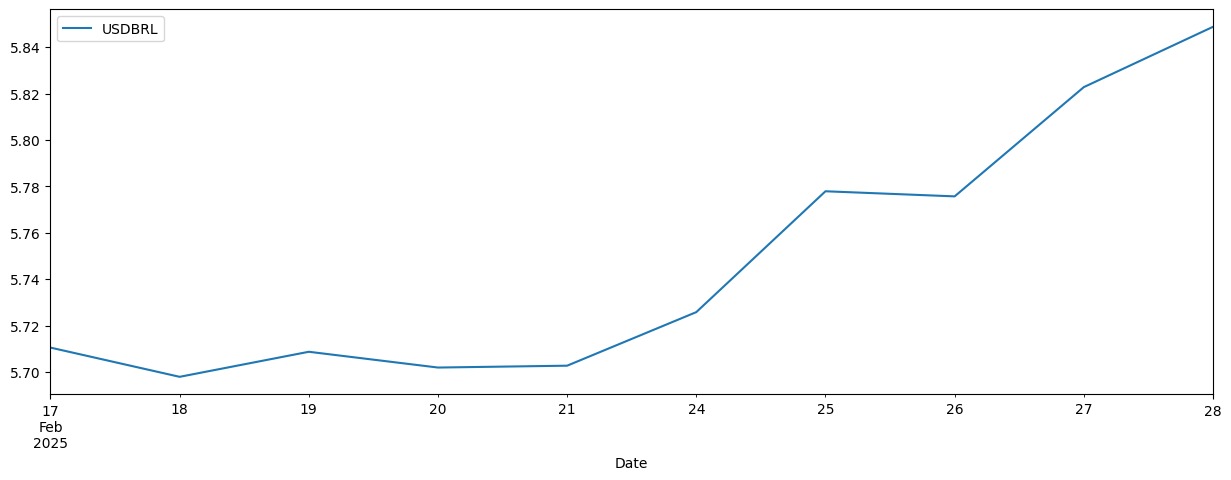

In [8]:
df.plot(figsize=(15, 5))

In [9]:
df = sgs.get({'USDBRL': 1}, start='2002-01-01', end='2021-01-01')

<Axes: xlabel='Date'>

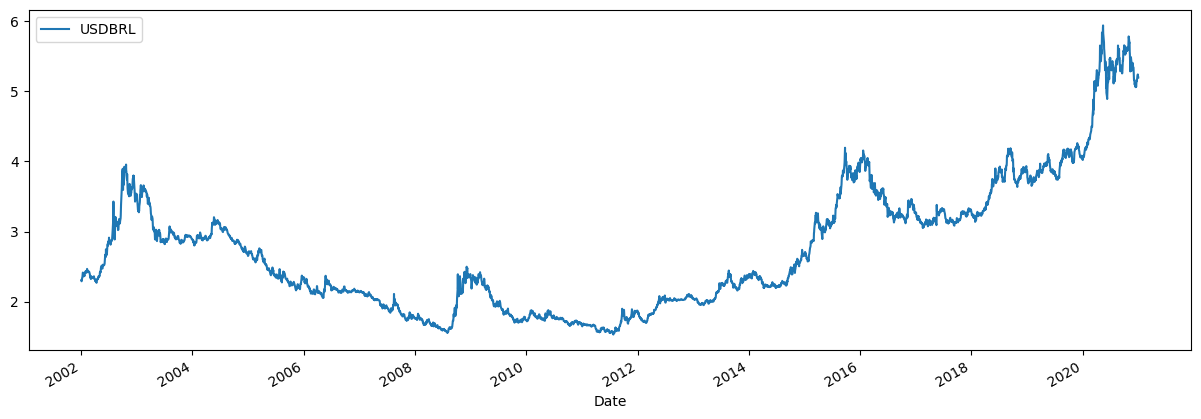

In [10]:
df.plot(figsize=(15, 5))

In [12]:
df = sgs.get({'IPCA': 433}, start='2002-01-01', end='2021-01-01')

<Axes: xlabel='Date'>

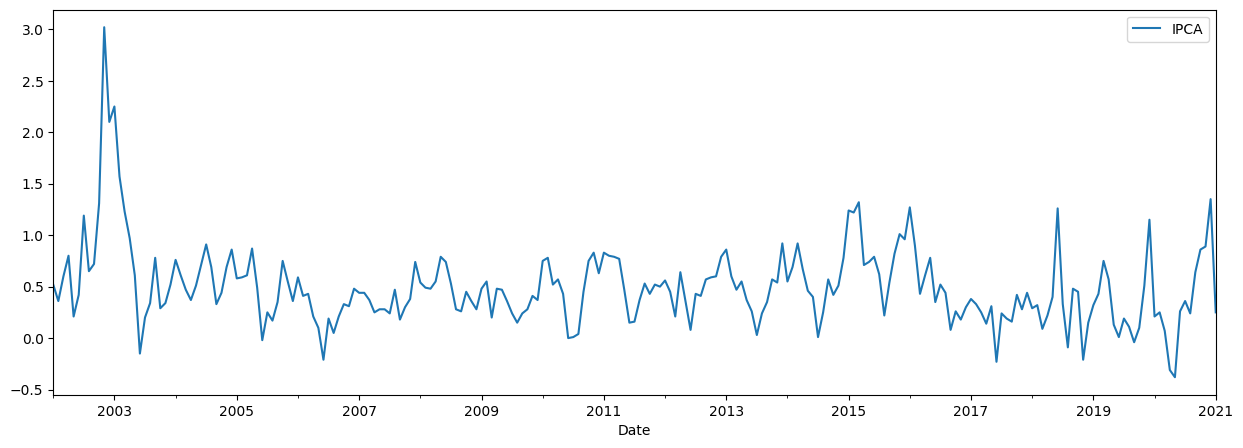

In [13]:
df.plot(figsize=(15, 5))

In [14]:
df = sgs.get({'IPCA': 433, 'IGPM': 189}, start='2002-01-01', end='2021-01-01', multi=False)
df

[            IPCA
 Date            
 2002-01-01  0.52
 2002-02-01  0.36
 2002-03-01  0.60
 2002-04-01  0.80
 2002-05-01  0.21
 ...          ...
 2020-09-01  0.64
 2020-10-01  0.86
 2020-11-01  0.89
 2020-12-01  1.35
 2021-01-01  0.25
 
 [229 rows x 1 columns],
             IGPM
 Date            
 2002-01-01  0.36
 2002-02-01  0.06
 2002-03-01  0.09
 2002-04-01  0.56
 2002-05-01  0.83
 ...          ...
 2020-09-01  4.34
 2020-10-01  3.23
 2020-11-01  3.28
 2020-12-01  0.96
 2021-01-01  2.58
 
 [229 rows x 1 columns]]

In [15]:
df = sgs.get({'IPCA': 433, 'USDBRL': 1}, start='2002-01-01', end='2021-01-01', multi=True)
df

,IPCA,USDBRL
Date,,
2002-01-01,0.52,NaN
2002-01-02,NaN,2.3066
2002-01-03,NaN,2.2932
2002-01-04,NaN,2.3101
2002-01-07,NaN,2.3428
...,...,...
2020-12-28,NaN,5.2390
2020-12-29,NaN,5.1942
2020-12-30,NaN,5.1967


In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('bmh')
# plt.style.context('bmh')

In [17]:
import numpy as np

In [18]:
df = sgs.get({'IPCA': 433}, start='2002-02-01')
df.index = df.index.to_period('M')

In [19]:
dfr = df.rolling(12)

In [20]:
i12 = dfr.apply(lambda x: (1 + x/100).prod() - 1).dropna() * 100

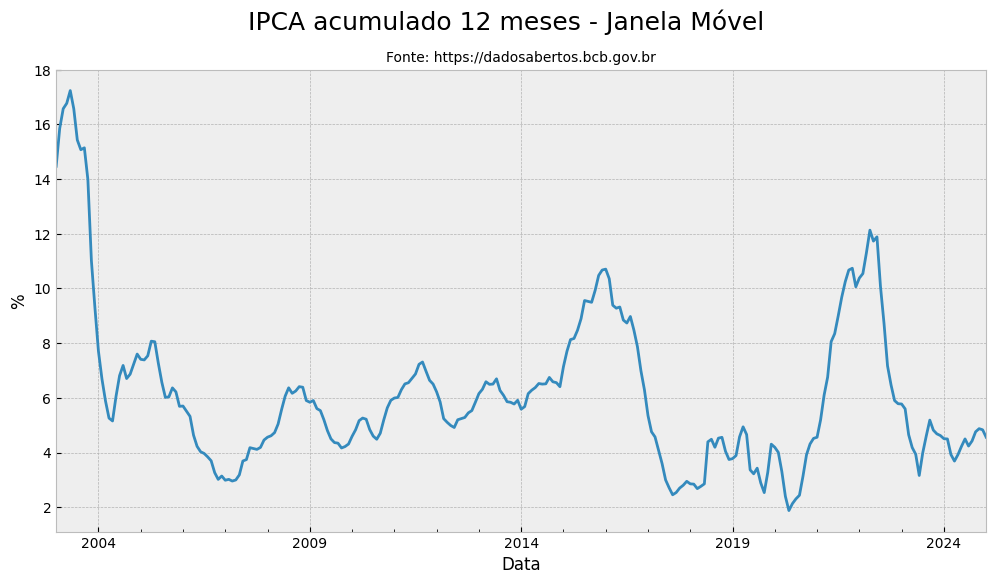

In [21]:
# with plt.style.context('bmh'):
i12.plot(figsize=(12,6))
plt.title('Fonte: https://dadosabertos.bcb.gov.br', fontsize=10)
plt.suptitle('IPCA acumulado 12 meses - Janela Móvel', fontsize=18)
plt.xlabel('Data')
plt.ylabel('%')
plt.legend().set_visible(False)

In [22]:
iY = df.resample('Y').agg(lambda x: (1 + x/100).prod() - 1) * 100

/tmp/ipykernel_66767/2255849618.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  iY = df.resample('Y').agg(lambda x: (1 + x/100).prod() - 1) * 100


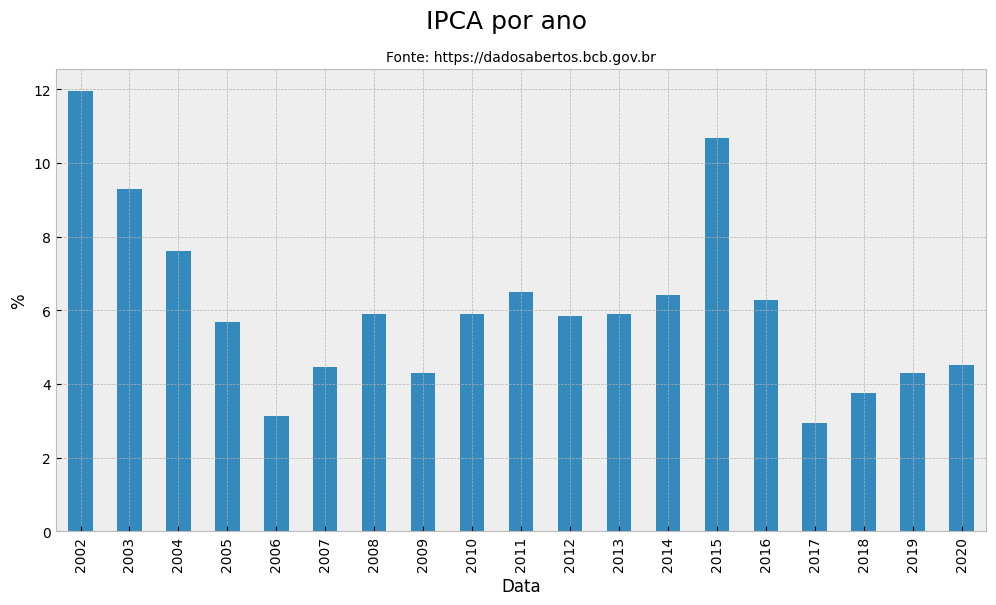

In [23]:
iY.loc['2002':'2020'].plot(kind='bar', figsize=(12,6))
plt.title('Fonte: https://dadosabertos.bcb.gov.br', fontsize=10)
plt.suptitle('IPCA por ano', fontsize=18)
plt.xlabel('Data')
plt.ylabel('%')
plt.legend().set_visible(False)

In [24]:
df = sgs.get({'SELIC': 1178}, start='2002-01-01', end= '2021-11-30')

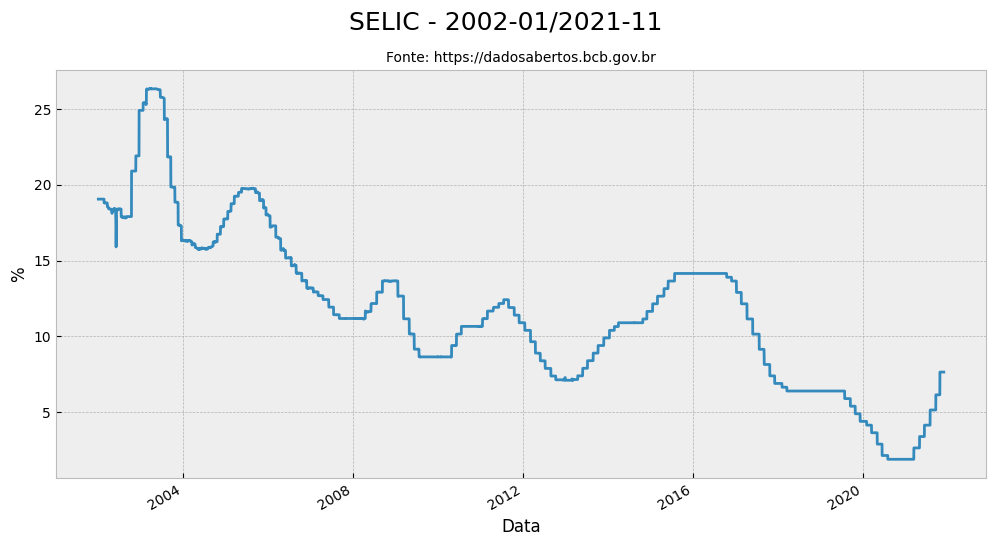

In [25]:
df.plot(figsize=(12,6))
plt.title('Fonte: https://dadosabertos.bcb.gov.br', fontsize=10)
plt.suptitle('SELIC - 2002-01/2021-11', fontsize=18)
plt.xlabel('Data')
plt.ylabel('%')
plt.legend().set_visible(False)

In [26]:
# Taxa de desemprego
countries = ('Germany', 'Canada', 'USA', 'France', 'Italy', 'Japan')
ids = [i for i in range(3785,3791)]
sgs.get(list(zip(countries, ids)), start='2000-01-01')

,Germany,Canada,USA,France,Italy,Japan
Date,,,,,,
2000-01-01,8.2,6.8,4.0,10.4,10.6,4.7
2000-02-01,8.1,6.9,4.1,10.2,10.6,4.9
2000-03-01,8.1,6.9,4.0,10.1,10.5,4.9
2000-04-01,8.0,6.7,3.8,9.9,10.3,4.8
2000-05-01,8.0,6.6,4.0,9.7,10.3,4.6
...,...,...,...,...,...,...
2016-04-01,4.3,7.1,5.0,9.9,11.5,3.2
2016-05-01,4.3,6.9,4.7,9.9,11.4,3.2
2016-06-01,4.3,6.8,4.9,10.1,11.6,3.1
